In [2]:
import numpy as np  # for array stuff and random
import random
import matplotlib.pyplot as plt  # for graphing our mean rewards over time
from matplotlib import style  # to make pretty charts because it matters.

import gym
from gym import spaces
from gym import envs
from gym.utils import seeding, EzPickle

In [3]:
seed = 543 # Do not change this
def fix(env, seed):
    env.seed(seed)
    env.action_space.seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [4]:
env = gym.make('pumpingAllocation-v2')
fix(env, seed)

#Pick scenerio
scenerio = 1

p = [0.33,0.33,0.34]
#p[scenerio-1] = 1
env.river_p = p

SW, GW, Sup, D, inflow = [], [], [], [], []
deficit=[]
S, h = [], []
num_satisfy, num_unsatisfy, num_sat_follow_unsat = 0, 0, 0

for i in range(1):
    print('----------test',i+1,'start-------------')
    state = env.reset()
    total_step=0
    action =[0,0]
    
    while True:
        month = (state[3]+1)/2*11+1
        storage = (state[0]+1)/2*25000
        Zmin_before = (state[1]+1)/2*110-30
        demand = (state[2]+1)/2*(6800-1000+1000)+1000-500
        inf = (state[4]+1)/2*(12000-100+600)+100-100
        
        if storage < demand:     #水庫水小於需求
            action[0] = storage//1000
            action[1] = min((demand - action[0]*1000)//300 + 1, 10)
        else:
            action[0] = min(demand//1000 + 1, 10)
            action[1] = 0
         
        next_state, reward, done, info = env.step(action)
        
        #
        month = (state[3]+1)/2*11+1
        storage = (state[0]+1)/2*25000
        Zmin_before = (state[1]+1)/2*110-30
        Zmin_after = (next_state[1]+1)/2*110-30
        demand = (state[2]+1)/2*(6800-1000+1000)+1000-500
        inf = (state[4]+1)/2*(12000-100+600)+100-100

        print(f'{month:2.0f}月, 第{total_step+1:2.0f}旬, 水庫水量:{storage:5.0f}, 水位(前、後):{Zmin_before:5.1f}→{Zmin_after:4.1f}, Action:{action}, SW、GW:[{action[0]*1000:3.0f}, {action[1]*300:3.0f}], 需水量:{demand:4.0f}, Reward: {reward:.1f}')
        
        SW.append(action[0]*1000)
        GW.append(action[1]*300)
        Sup.append(action[0]*1000+action[1]*300)
        D.append(demand)
        deficit.append(max(0,demand-action[0]*1000-action[1]*300))
        S.append(storage)
        h.append(Zmin_before)
        inflow.append(inf)
        
        if deficit[-1]>0:
            num_unsatisfy += 1
        else:
            if len(deficit)>1 and deficit[-2]>0:
                num_sat_follow_unsat += 1
                num_satisfy += 1
            else:
                num_satisfy += 1
        
        state = next_state
        total_step+=1

        if done:
            break

----------test 1 start-------------
 1月, 第 1旬, 水庫水量:15000, 水位(前、後): 80.0→80.0, Action:[2.0, 0], SW、GW:[2000,   0], 需水量:1500, Reward: -1.0
 1月, 第 2旬, 水庫水量:13600, 水位(前、後): 80.0→80.0, Action:[1.0, 0], SW、GW:[1000,   0], 需水量: 600, Reward: -1.0
 1月, 第 3旬, 水庫水量:12700, 水位(前、後): 80.0→80.0, Action:[2.0, 0], SW、GW:[2000,   0], 需水量:1500, Reward: -1.0
 2月, 第 4旬, 水庫水量:11000, 水位(前、後): 80.0→80.0, Action:[3.0, 0], SW、GW:[3000,   0], 需水量:2200, Reward: -1.0
 2月, 第 5旬, 水庫水量: 8900, 水位(前、後): 80.0→80.0, Action:[3.0, 0], SW、GW:[3000,   0], 需水量:2100, Reward: -1.0
 2月, 第 6旬, 水庫水量: 6600, 水位(前、後): 80.0→80.0, Action:[3.0, 0], SW、GW:[3000,   0], 需水量:2100, Reward: -1.0
 3月, 第 7旬, 水庫水量: 4500, 水位(前、後): 80.0→80.0, Action:[4.0, 0], SW、GW:[4000,   0], 需水量:3800, Reward: 2.0
 3月, 第 8旬, 水庫水量: 1300, 水位(前、後): 80.0→19.4, Action:[1.0, 10.0], SW、GW:[1000, 3000], 需水量:3900, Reward: 2.0
 3月, 第 9旬, 水庫水量: 1100, 水位(前、後): 19.4→ 8.4, Action:[1.0, 9.0], SW、GW:[1000, 2700], 需水量:3500, Reward: 1.0
 4月, 第10旬, 水庫水量:  800, 水位(前、後):  8.4→-1.4,

 4月, 第82旬, 水庫水量: 2700, 水位(前、後): 69.8→33.1, Action:[2.0, 7.0], SW、GW:[2000, 2100], 需水量:3800, Reward: 2.0
 4月, 第83旬, 水庫水量: 3000, 水位(前、後): 33.1→58.8, Action:[3.0, 2.0], SW、GW:[3000, 600], 需水量:3300, Reward: 2.0
 4月, 第84旬, 水庫水量: 1700, 水位(前、後): 58.8→15.8, Action:[1.0, 9.0], SW、GW:[1000, 2700], 需水量:3500, Reward: 2.0
 5月, 第85旬, 水庫水量: 2500, 水位(前、後): 15.8→39.5, Action:[2.0, 4.0], SW、GW:[2000, 1200], 需水量:2900, Reward: 2.0
 5月, 第86旬, 水庫水量: 6200, 水位(前、後): 39.5→71.8, Action:[3.0, 0], SW、GW:[3000,   0], 需水量:2600, Reward: 2.0
 5月, 第87旬, 水庫水量: 9000, 水位(前、後): 71.8→79.5, Action:[4.0, 0], SW、GW:[4000,   0], 需水量:3400, Reward: 2.0
 6月, 第88旬, 水庫水量:10300, 水位(前、後): 79.5→80.0, Action:[3.0, 0], SW、GW:[3000,   0], 需水量:2500, Reward: 2.0
 6月, 第89旬, 水庫水量:13700, 水位(前、後): 80.0→80.0, Action:[3.0, 0], SW、GW:[3000,   0], 需水量:2900, Reward: 2.0
 6月, 第90旬, 水庫水量:16700, 水位(前、後): 80.0→80.0, Action:[4.0, 0], SW、GW:[4000,   0], 需水量:3200, Reward: -1.0
 7月, 第91旬, 水庫水量:19000, 水位(前、後): 80.0→80.0, Action:[3.0, 0], SW、GW:[3000,   0], 

 6月, 第162旬, 水庫水量:15000, 水位(前、後): 80.0→80.0, Action:[4.0, 0], SW、GW:[4000,   0], 需水量:3100, Reward: -1.0
 7月, 第163旬, 水庫水量:17400, 水位(前、後): 80.0→80.0, Action:[4.0, 0], SW、GW:[4000,   0], 需水量:3500, Reward: 2.0
 7月, 第164旬, 水庫水量:17700, 水位(前、後): 80.0→80.0, Action:[3.0, 0], SW、GW:[3000,   0], 需水量:2700, Reward: 2.0
 7月, 第165旬, 水庫水量:18700, 水位(前、後): 80.0→80.0, Action:[3.0, 0], SW、GW:[3000,   0], 需水量:2700, Reward: 2.0
 8月, 第166旬, 水庫水量:19800, 水位(前、後): 80.0→80.0, Action:[5.0, 0], SW、GW:[5000,   0], 需水量:4100, Reward: -1.0
 8月, 第167旬, 水庫水量:23300, 水位(前、後): 80.0→80.0, Action:[4.0, 0], SW、GW:[4000,   0], 需水量:3700, Reward: 2.0
 8月, 第168旬, 水庫水量:25000, 水位(前、後): 80.0→80.0, Action:[4.0, 0], SW、GW:[4000,   0], 需水量:3700, Reward: 2.0
 9月, 第169旬, 水庫水量:25000, 水位(前、後): 80.0→80.0, Action:[7.0, 0], SW、GW:[7000,   0], 需水量:6200, Reward: 2.0
 9月, 第170旬, 水庫水量:21200, 水位(前、後): 80.0→80.0, Action:[6.0, 0], SW、GW:[6000,   0], 需水量:5200, Reward: 2.0
 9月, 第171旬, 水庫水量:18400, 水位(前、後): 80.0→80.0, Action:[7.0, 0], SW、GW:[7000,   0], 

c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


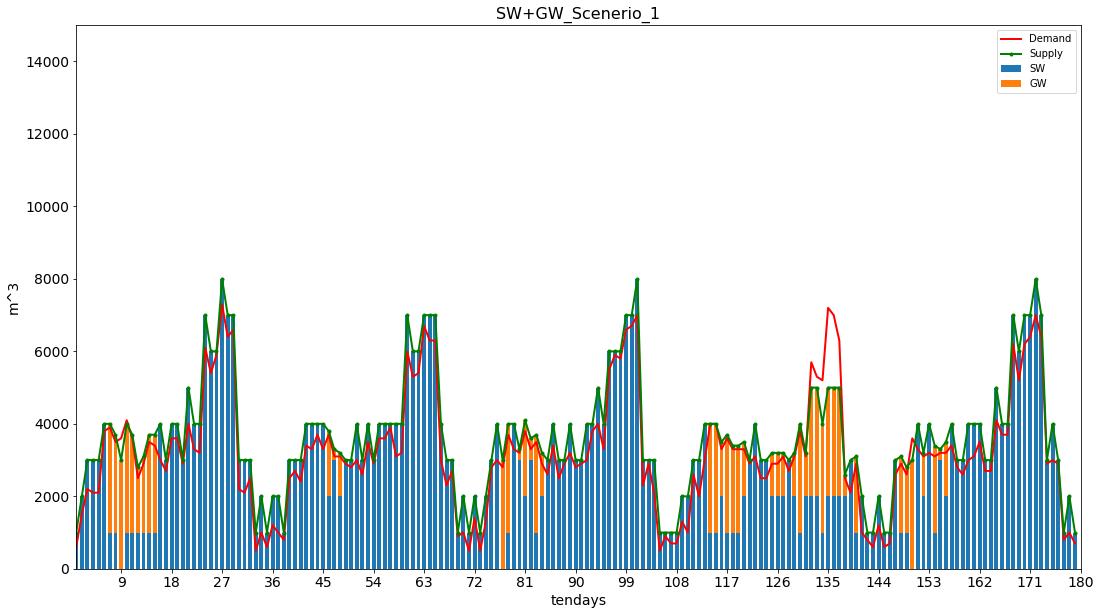

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
end=180

df = pd.DataFrame({'SW':SW[:end],
                   'GW':GW[:end],
                   'Supply':Sup[:end],
                   'Demand':D[:end],
                   'ith period of tendays':[i for i in range(1,end+1)],
                   'deficit':deficit[:end],
                   'S':S[:end],
                   'h':h[:end],
                   'In':inflow[:end],
                   'deficit_rate':[(b-a)/b*100 for a,b in zip(Sup[:end],D[:end])]
                  }) 


ax = df[['SW','GW']].plot(kind='bar', stacked=True, figsize=(18,10), width=0.7,
                          xlim=[1,180], ylim=[0,15000], xticks=[9*i for i in range(1,21)], fontsize=14)
df['Demand'].plot(kind='line', color='#FF0000', lw=2, xlim=[1,180],legend=True)
df['Supply'].plot(kind='line', style='g.-', lw=2, xlim=[1,180],legend=True)
ax.set_title('SW+GW_Scenerio_{}'.format(scenerio), fontsize=16)
ax.set_xlabel("tendays", fontsize=14)
ax.set_ylabel("m^3", fontsize=14)
ax.legend()

In [15]:
print(num_satisfy, num_unsatisfy, num_sat_follow_unsat)
rel = round(num_satisfy/180,2)
res = round(num_sat_follow_unsat/num_unsatisfy,2)
vul = round(np.sum(deficit)/num_unsatisfy/np.sum(D),2)

SI = round((rel*res*(1-vul))**0.3333,2)
print(rel,res,vul)
print(SI)

171 9 3
0.95 0.33 0.0
0.68


c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


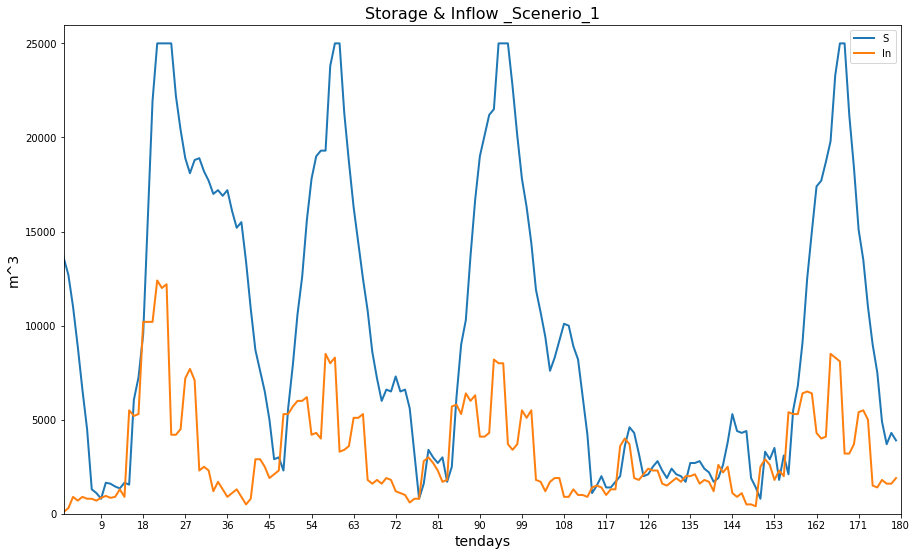

In [6]:
ax = df[['S', 'In']].plot(kind='line', lw='2', figsize=(15,9),xlim=[1,180], ylim=[0,26000], xticks=[9*i for i in range(1,21)])
ax.set_title('Storage & Inflow _Scenerio_{}'.format(scenerio), fontsize=16)
ax.set_xlabel("tendays", fontsize=14)
ax.set_ylabel("m^3", fontsize=14)
ax.legend()

c:\users\johnny\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'groundwater head (m)')

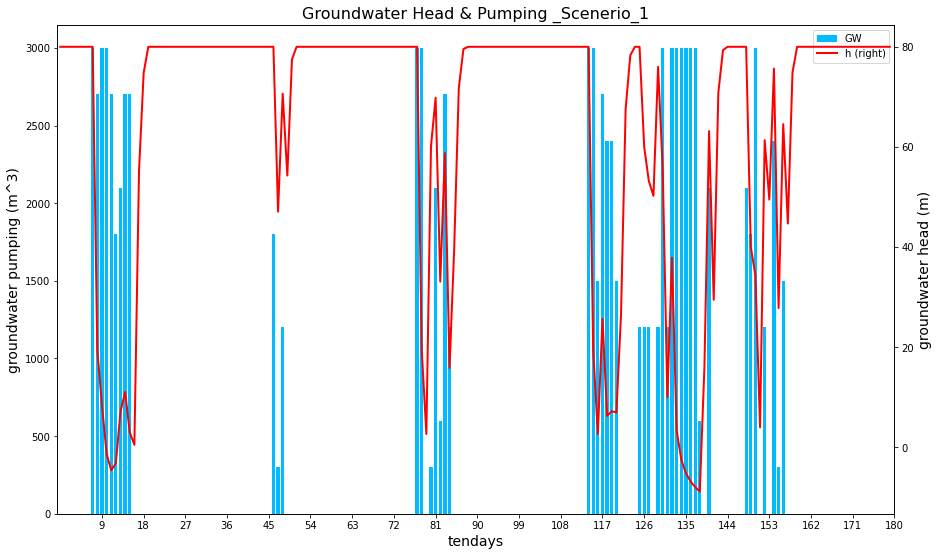

In [7]:
ax = df['GW'].plot(kind='bar', color='#00bbff',width=0.7, figsize=(15,9), xlim=[1,180], xticks=[9*i for i in range(1,21)], legend=True)
ax2 = df['h'].plot(kind='line', secondary_y = True,  lw=2, color='#FF0000', legend=True)
ax.set_title('Groundwater Head & Pumping _Scenerio_{}'.format(scenerio), fontsize=16)
ax.set_xlabel("tendays", fontsize=14)
ax.set_ylabel("groundwater pumping (m^3)", fontsize=14)
ax2.set_ylabel("groundwater head (m)", fontsize=14)